 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [3]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


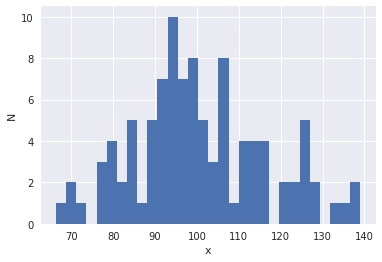

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.57, standard deviation: 15.70


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [9]:
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
mysize = []
for i in range(100):
    mysize.append(int(i*19.9)+10)
print (mysize)

[10, 29, 49, 69, 89, 109, 129, 149, 169, 189, 209, 228, 248, 268, 288, 308, 328, 348, 368, 388, 408, 427, 447, 467, 487, 507, 527, 547, 567, 587, 607, 626, 646, 666, 686, 706, 726, 746, 766, 786, 806, 825, 845, 865, 885, 905, 925, 945, 965, 985, 1004, 1024, 1044, 1064, 1084, 1104, 1124, 1144, 1164, 1184, 1204, 1223, 1243, 1263, 1283, 1303, 1323, 1343, 1363, 1383, 1403, 1422, 1442, 1462, 1482, 1502, 1522, 1542, 1562, 1582, 1602, 1621, 1641, 1661, 1681, 1701, 1721, 1741, 1761, 1781, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


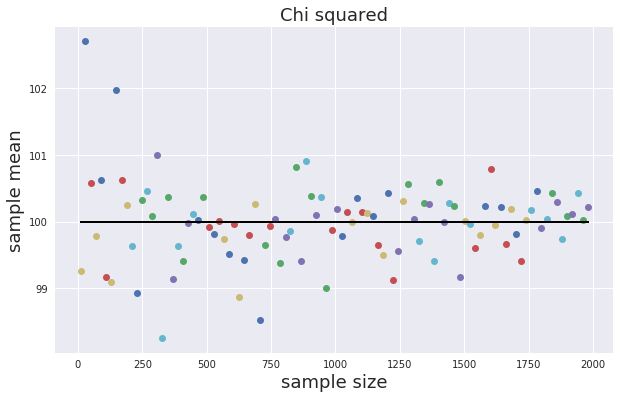

In [10]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: When the sample size is small the sample mean may deviate from the expectation mean. But when the sample size getting larger the sample mean getting colse to the expectation mean which in line of law of large numbers. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


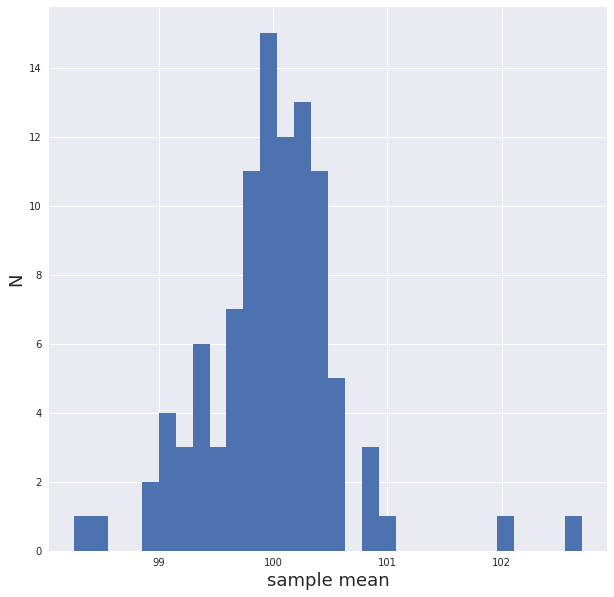

In [11]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: The histogram has the appearance of bell curve. Due to the small size of sample the shape is not perfectly fit the bell curve. But we can still say it's in line with Central Limit Theorem.

# Do it for the Normal distribution


In [12]:
distributions1 = ['gaus']

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


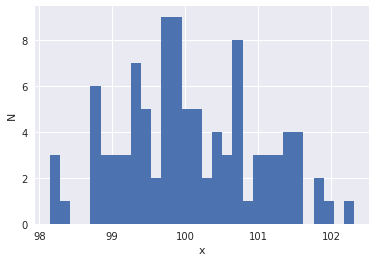

In [29]:
import numpy as np
md1 = {}
# md1 is an empty disctionary
md1['gaus'] = np.random.normal(loc=100, scale=1.0,size=100)
# md1 now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md1['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 4: Gauss distribution: μ = 100, N=100

In [14]:
print ("Gaus mean: %.2f, standard deviation: %.2f"%(md1['gaus'].mean(), md1['gaus'].std()))

Gaus mean: 100.16, standard deviation: 0.91


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


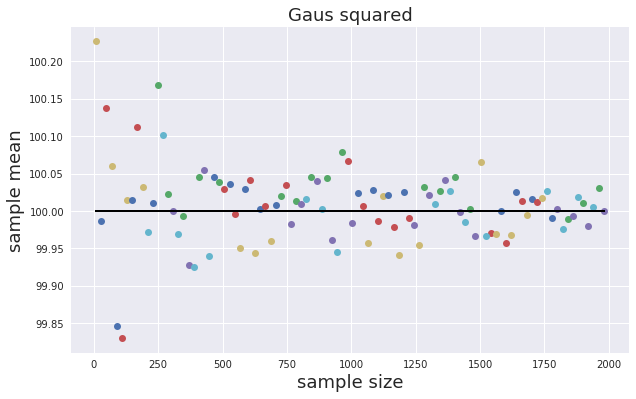

In [15]:
md1['gaus'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md1['gaus'][n] = np.random.normal(loc=100, scale=1.0, size = n)
    
# save the means for plotting later    

md1['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md1['gaus']:
    if not type(nn) == str:
        md1['gaus']['means'][nn] = md1['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, md1['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaus squared', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [df,df], 'k')

### Figure 5: When the sample size is small the sample mean may deviate from the expectation mean. But when the sample size getting larger the sample mean getting colse to the expectation mean which in line of law of large numbers. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


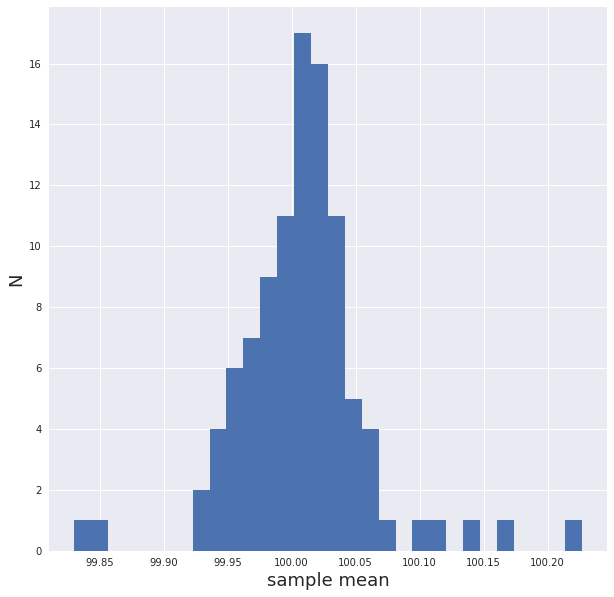

In [16]:
allmeans1 = list(md1['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans1,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 6: The histogram has the appearance of bell curve. Due to the small size of sample the shape is not perfectly fit the bell curve. But we can still say it's in line with Central Limit Theorem.

# Do it for the Poisson distribution

In [17]:
distributions2 = ['pois']

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


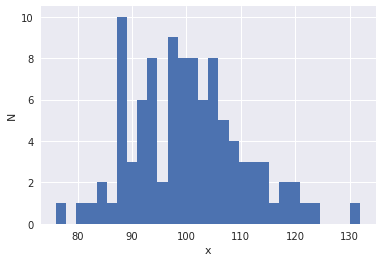

In [18]:
import numpy as np
md2 = {}
# md2 is an empty disctionary
md2['pois'] = np.random.poisson(lam=100,size=100)
# md2 now is a dictionary with one object: an array by the key 'pois'
pl.hist(md2['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 7: Poisson distribution: λ = 100, N=100

In [19]:
print ("Pois mean: %.2f, standard deviation: %.2f"%(md2['pois'].mean(), md2['pois'].std()))

Pois mean: 100.20, standard deviation: 10.10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


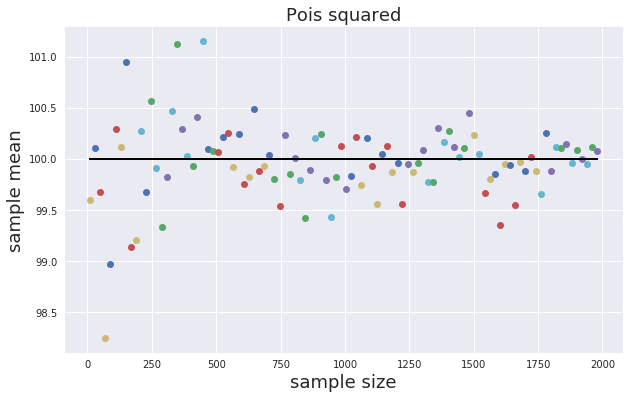

In [20]:
md2['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md2['pois'][n] = np.random.poisson(lam=100, size = n)
    
# save the means for plotting later    

md2['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md2['pois']:
    if not type(nn) == str:
        md2['pois']['means'][nn] = md2['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md2['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Pois squared', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 8: When the sample size is small the sample mean may deviate from the expectation mean. But when the sample size getting larger the sample mean getting colse to the expectation mean which in line of law of large numbers. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


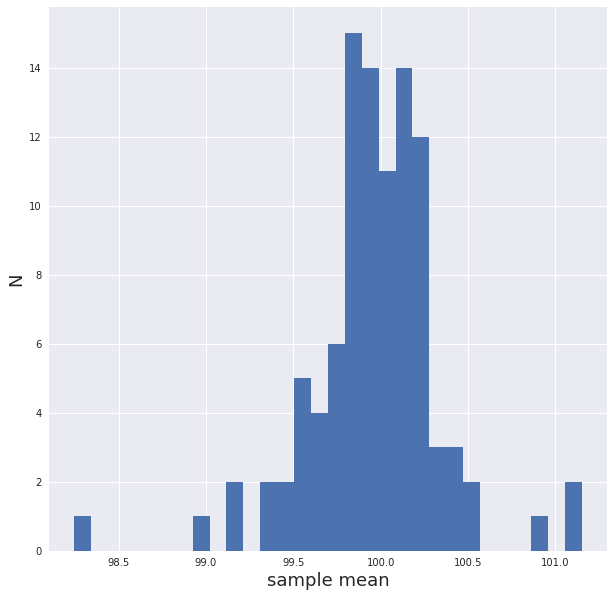

In [21]:
allmeans2 = list(md2['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans2,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 9: The histogram has the appearance of bell curve. Due to the small size of sample the shape is not perfectly fit the bell curve. But we can still say it's in line with Central Limit Theorem.

# Do it for the Binomial distribution

In [22]:
distributions3 = ['binomial']

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


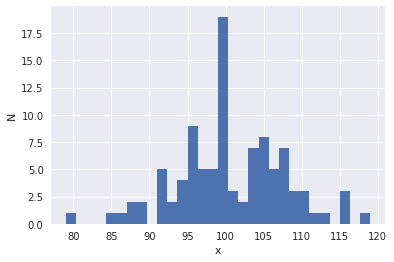

In [23]:
import numpy as np
md3 = {}
# md3 is an empty disctionary
md3['binomial'] = np.random.binomial(n=200,p=0.5,size=100)
# md2 now is a dictionary with one object: an array by the key 'pois'
pl.hist(md3['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 10: Binominal distribution: n = 200, p=0.5,N=100

In [24]:
print ("Pois mean: %.2f, standard deviation: %.2f"%(md3['binomial'].mean(), md3['binomial'].std()))

Pois mean: 100.53, standard deviation: 7.13


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


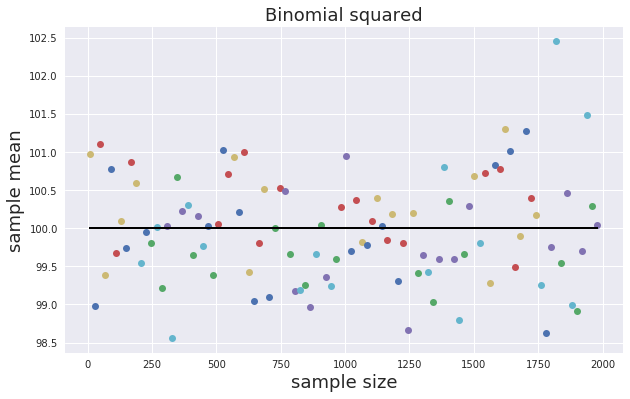

In [25]:
md3['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md3['binomial'][n] = np.random.binomial(n=200,p=0.5,size=100)
    
# save the means for plotting later    

md3['binomial']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md3['binomial']:
    if not type(nn) == str:
        md3['binomial']['means'][nn] = md3['binomial'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md3['binomial']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Binomial squared', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 11: When the sample size is small the sample mean may deviate from the expectation mean. But when the sample size getting larger the sample mean getting colse to the expectation mean which in line of law of large numbers. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


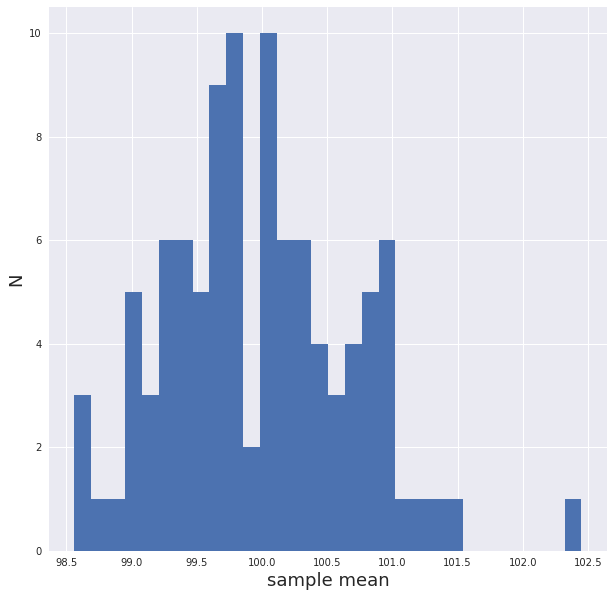

In [26]:
allmeans3 = list(md3['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans3,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 12: The histogram has the appearance of bell curve. Due to the small size of sample the shape is not perfectly fit the bell curve. But we can still say it's in line with Central Limit Theorem.

# Do it for another distribution

In [ ]:
distributions3 = ['lognormal']

In [ ]:
import numpy as np
md4 = {}
md4['lognormal'] = np.random.standard_cauchy(size=100)
pl.hist(md4['lognormal'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')